> Loading data... 
> Data Loaded. Compiling...
> Compilation Time :  0.03304314613342285
Train on 1214 samples, validate on 64 samples
Epoch 1/1
1214/1214 [==============================] - 16s - loss: 0.0024 - val_loss: 0.0013
Training duration (s) :  38.39816188812256


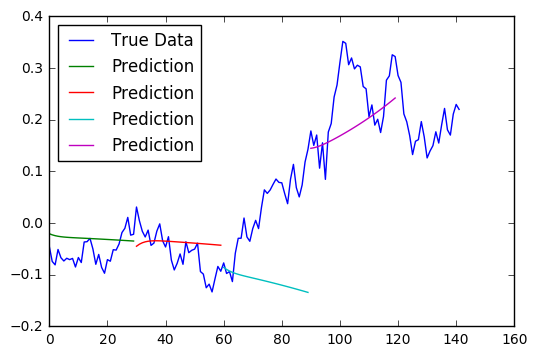

In [11]:
import lstm2
import time
import matplotlib.pyplot as plt

def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.show()

def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.legend(loc='upper left')
    plt.show()

#Main Run Thread
if __name__=='__main__':
    global_start_time = time.time()
    epochs  = 1
    seq_len = 100

    print('> Loading data... ')

    X_train, y_train, X_test, y_test = lstm2.load_data('ewt.csv', seq_len, True)

    print('> Data Loaded. Compiling...')

    model = lstm2.build_model([1, 50, 100, 1])

    model.fit(
        X_train,
        y_train,
        batch_size=100,
        nb_epoch=epochs,
        validation_split=0.05)

    predictions = lstm2.predict_sequences_multiple(model, X_test, seq_len, 30)
    #predicted = lstm.predict_sequence_full(model, X_test, seq_len)
    #predicted = lstm.predict_point_by_point(model, X_test)        

    print('Training duration (s) : ', time.time() - global_start_time)
    plot_results_multiple(predictions, y_test, 30)